In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Sumit\Desktop\project\UEFA EURO 2024 analysis\euro2024_players.csv')
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [4]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [7]:
df['Foot'].fillna(df['Foot'].mode()[0], inplace=True)

C:\Users\Sumit\AppData\Local\Temp\ipykernel_5636\415991966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Foot'].fillna(df['Foot'].mode()[0], inplace=True)


In [8]:
df.isnull().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           0
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [9]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [10]:
df['Position'].value_counts()

Position
Centre-Back           125
Central Midfield       81
Centre-Forward         77
Goalkeeper             72
Defensive Midfield     50
Attacking Midfield     48
Left Winger            44
Right-Back             43
Right Winger           35
Left-Back              33
Right Midfield          6
Second Striker          5
Left Midfield           4
Name: count, dtype: int64

In [11]:
df['Age'].value_counts().sort_index()

Age
16     1
18     4
19     6
20    12
21    31
22    29
23    42
24    52
25    62
26    58
27    59
28    56
29    44
30    36
31    36
32    35
33    15
34    17
35    12
36     5
37     5
38     4
39     1
41     1
Name: count, dtype: int64

In [27]:
df['Club'].value_counts()

Club
Manchester City          13
Inter Milan              13
FC Barcelona             12
Real Madrid              12
Paris Saint-Germain      12
                         ..
FC Südtirol               1
NK Olimpija Ljubljana     1
Barnsley FC               1
NK Celje                  1
Twente Enschede FC        1
Name: count, Length: 219, dtype: int64

In [22]:
club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)
print(club_goals)
club_goals.idxmax()

Club
Bayern Munich         145
FC Barcelona          143
Al-Nassr FC           136
Atlético de Madrid    135
AS Roma               100
                     ... 
Luton Town              0
Lokomotiv Moscow        0
Levante UD              0
Leeds United            0
Újpest FC               0
Name: Goals, Length: 219, dtype: int64


'Bayern Munich'

In [23]:
club_marketvalue = df.groupby('Club')['MarketValue'].sum().sort_values(ascending=False)
print(club_marketvalue)
club_marketvalue.idxmax()

Club
Manchester City            826000000
Paris Saint-Germain        658000000
Arsenal FC                 585000000
Bayern Munich              572000000
Real Madrid                518000000
                             ...    
Vejle Boldklub                300000
Union Saint-Gilloise          300000
NK Maribor                    300000
Grasshopper Club Zurich       200000
Dinamo Tbilisi                 50000
Name: MarketValue, Length: 219, dtype: int64


'Manchester City'

In [25]:
club_caps = df.groupby('Club')['Caps'].sum().sort_values(ascending=False)
print(club_caps)
club_caps.idxmax()

Club
Manchester City           746
Bayern Munich             668
Inter Milan               642
FC Barcelona              572
Real Madrid               531
                         ... 
OGC Nice                    1
Motherwell FC               1
Real Betis Balompié         1
Persepolis FC               0
New England Revolution      0
Name: Caps, Length: 219, dtype: int64


'Manchester City'

In [29]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [39]:
import matplotlib.pyplot as plt
position_marketvalue = df.groupby('Position')['MarketValue'].mean().reset_index()
position_marketvalue

,Position,MarketValue
0,Attacking Midfield,2.893542e+07
1,Central Midfield,1.983457e+07
2,Centre-Back,1.539440e+07
3,Centre-Forward,1.918182e+07
4,Defensive Midfield,2.190400e+07
5,Goalkeeper,1.081910e+07
6,Left Midfield,8.375000e+06
7,Left Winger,2.067727e+07
8,Left-Back,2.017879e+07
9,Right Midfield,1.526667e+07


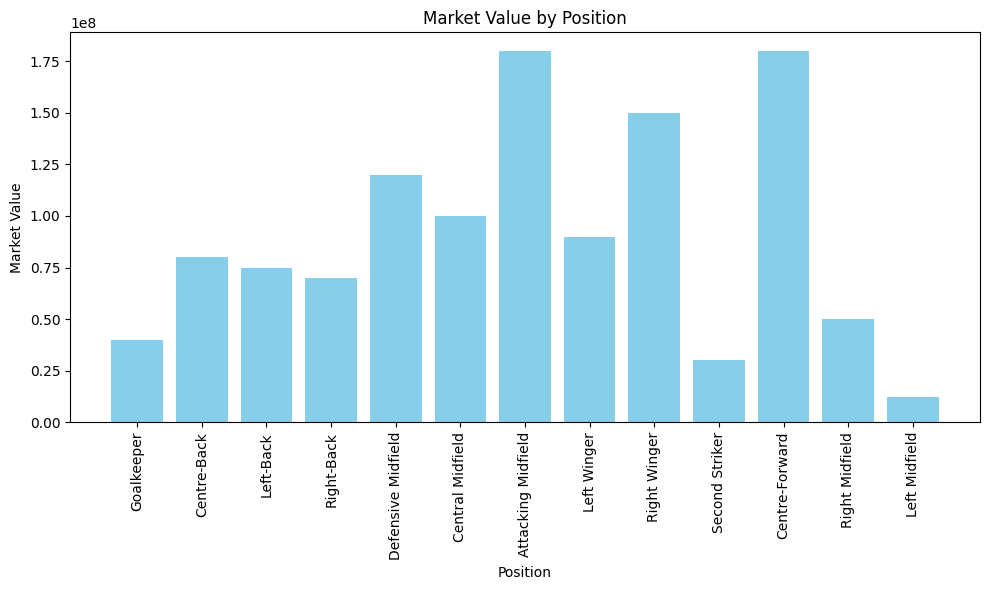

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(df['Position'], df['MarketValue'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Market Value')
plt.title('Market Value by Position')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         623 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


C:\Users\Sumit\AppData\Local\Temp\ipykernel_5636\130517302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Position', palette='Set2')


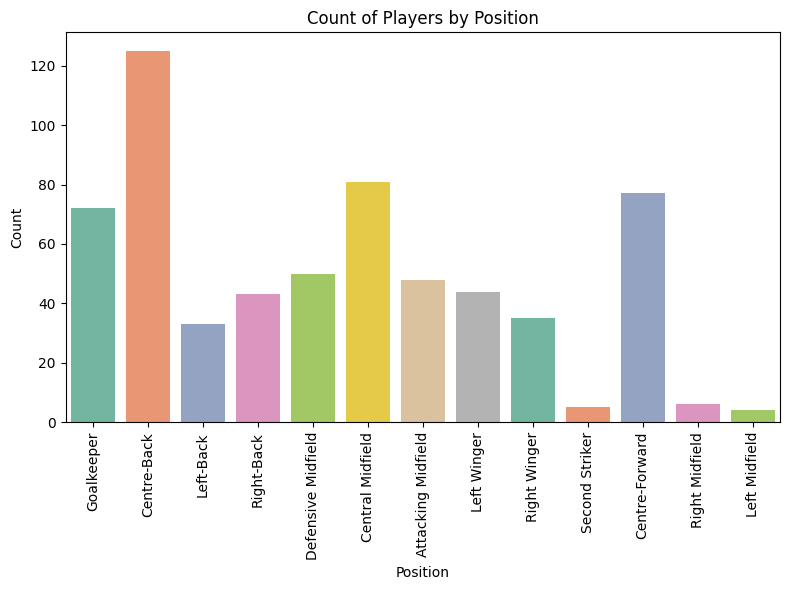

In [45]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Position', palette='Set2')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Count of Players by Position')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

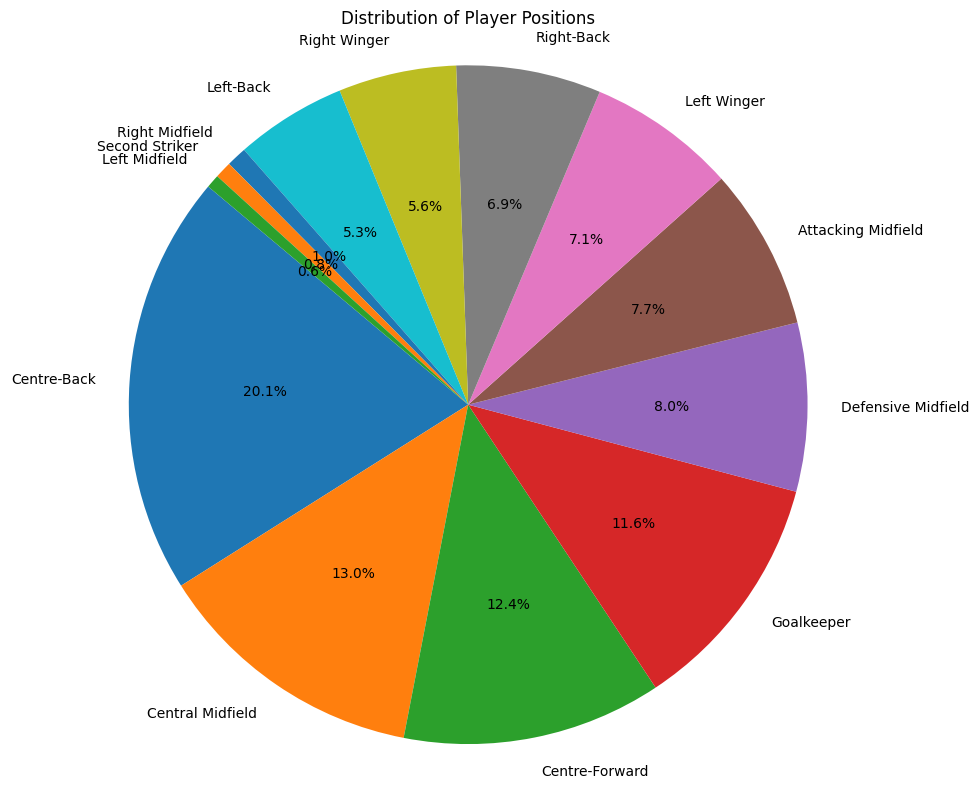

In [47]:
# Counting occurrences of each position
position_counts = df['Position'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Player Positions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [48]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


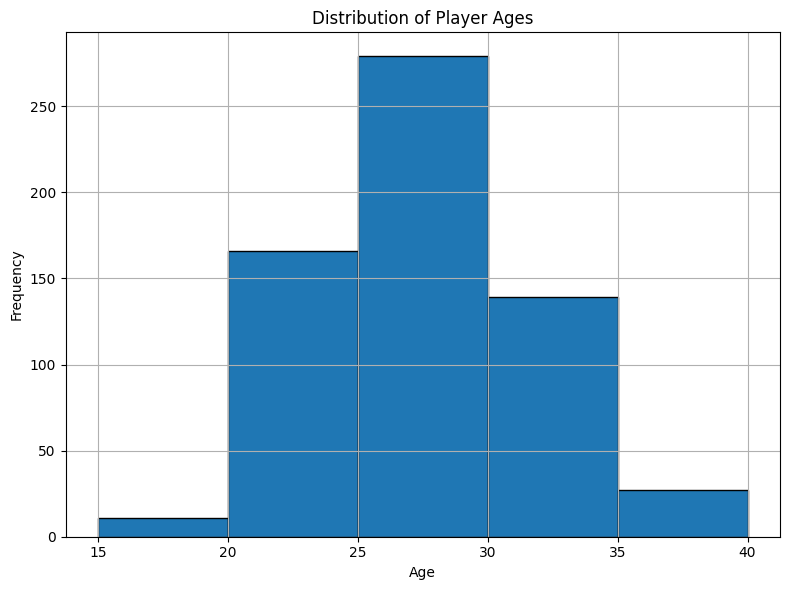

In [62]:
bins = [15, 20, 25, 30, 35, 40]
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=bins, edgecolor='black')  
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ages')
plt.grid(True)
plt.xticks(bins)  # Set x-axis ticks to match the bin edges
plt.tight_layout()
plt.show()

In [68]:
df['Country'].value_counts()

Country
Poland            27
Serbia            26
Portugal          26
Georgia           26
Turkiye           26
Ukraine           26
Romania           26
Slovakia          26
Austria           26
Netherlands       26
Scotland          26
Germany           26
Denmark           26
England           26
Slovenia          26
Italy             26
Albania           26
Croatia           26
Spain             26
Switzerland       26
Hungary           26
Czech Republic    26
France            25
Belgium           25
Name: count, dtype: int64

C:\Users\Sumit\AppData\Local\Temp\ipykernel_5636\4173336246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', palette='Set2')


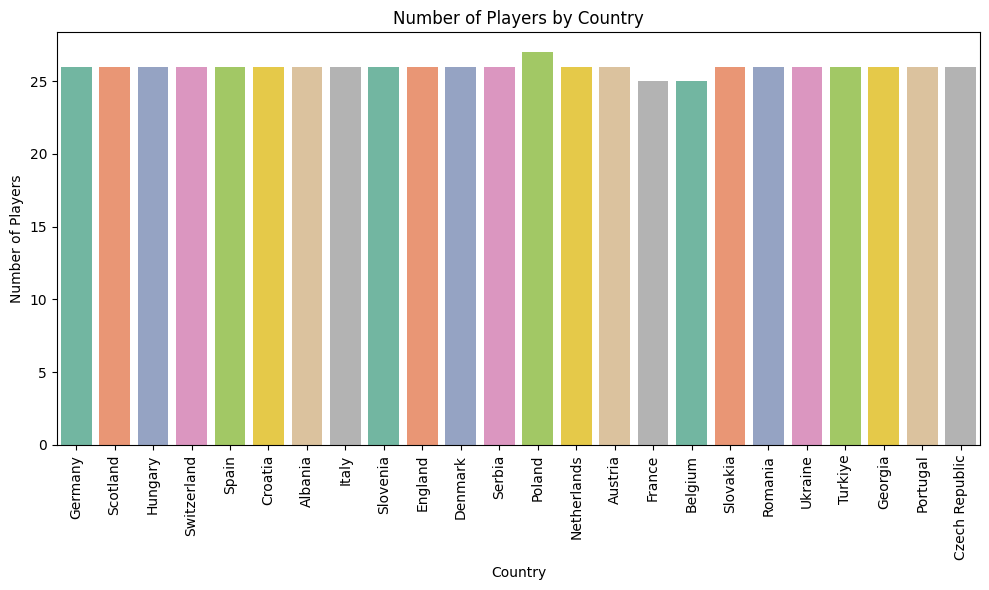

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', palette='Set2')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Number of Players by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [74]:
country_stats = df.groupby('Country').agg({
    'Goals': sum,
    'MarketValue': sum,
    'Caps': sum,
}).reset_index()


# Sorting by highest values
country_stats = country_stats.sort_values(by=['Goals', 'Caps', 'MarketValue'], ascending=False)

print(country_stats)

           Country  Goals  MarketValue  Caps
14        Portugal    225   1054500000  1113
7           France    192   1234000000   836
2          Belgium    177    584500000   949
13          Poland    154    212400000   825
3          Croatia    147    327700000  1152
12     Netherlands    141    845000000   838
5          Denmark    135    415500000  1071
9          Germany    134    851000000   906
17          Serbia    129    311800000   860
21     Switzerland    125    282000000  1092
23         Ukraine    114    379000000   849
6          England    100   1515000000   651
20           Spain     95    965500000   535
1          Austria     93    235500000   613
19        Slovenia     78    139500000   771
22         Turkiye     71    324100000   632
18        Slovakia     67    156700000   862
4   Czech Republic     65    193900000   405
8          Georgia     64    160150000   750
15         Romania     63     92125000   590
10         Hungary     60    164450000   750
16        

C:\Users\Sumit\AppData\Local\Temp\ipykernel_5636\3200809263.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  country_stats = df.groupby('Country').agg({
C:\Users\Sumit\AppData\Local\Temp\ipykernel_5636\3200809263.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  country_stats = df.groupby('Country').agg({


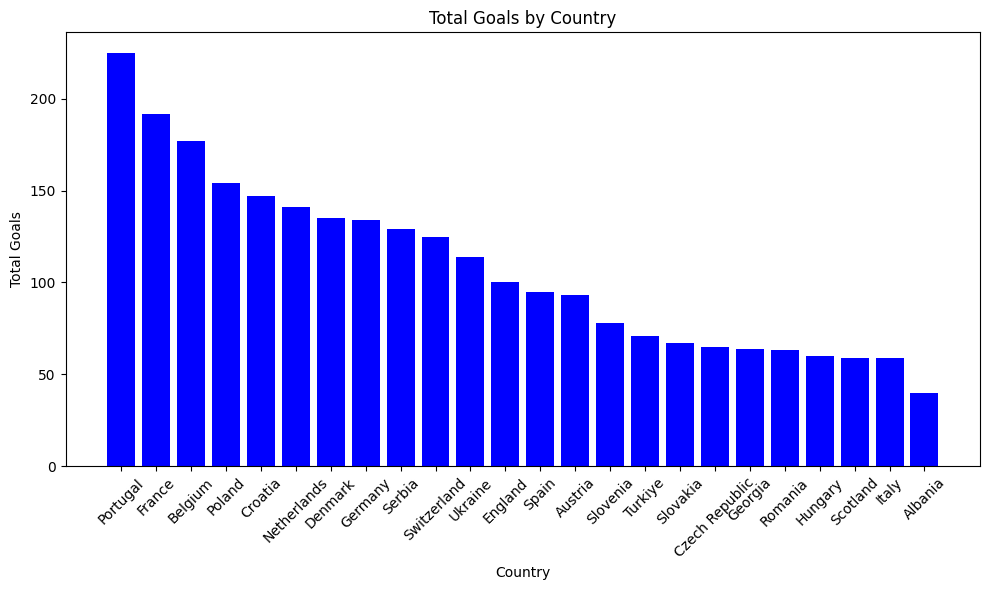

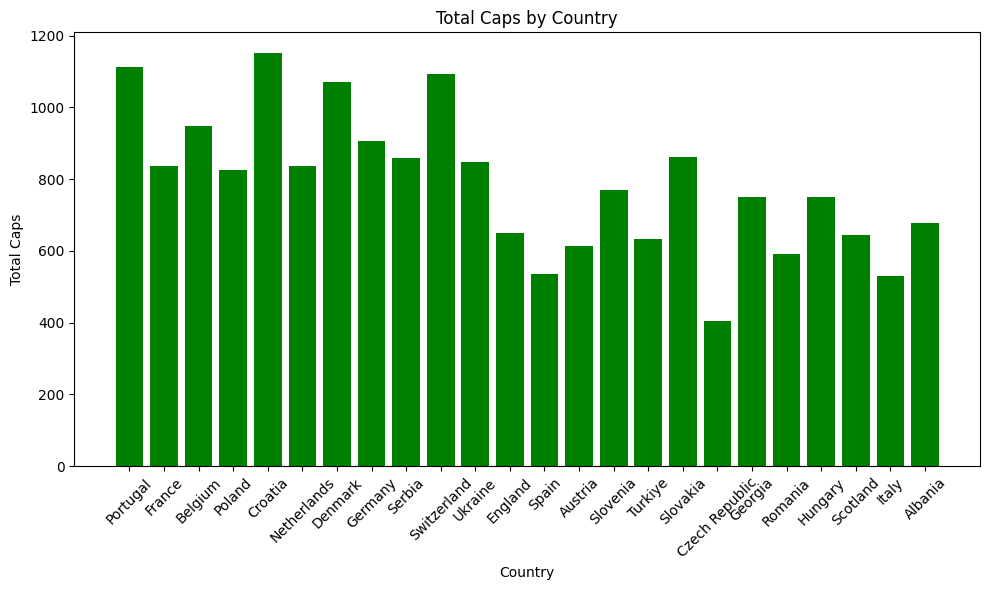

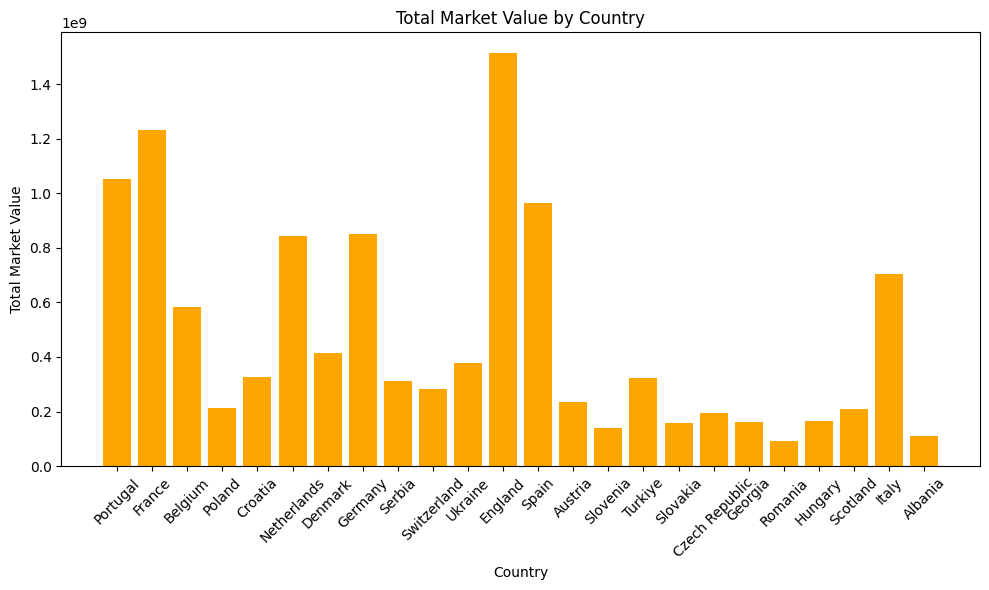

In [75]:
import matplotlib.pyplot as plt

# Plotting goals
plt.figure(figsize=(10, 6))
plt.bar(country_stats['Country'], country_stats['Goals'], color='blue')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.title('Total Goals by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting caps
plt.figure(figsize=(10, 6))
plt.bar(country_stats['Country'], country_stats['Caps'], color='green')
plt.xlabel('Country')
plt.ylabel('Total Caps')
plt.title('Total Caps by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting market value
plt.figure(figsize=(10, 6))
plt.bar(country_stats['Country'], country_stats['MarketValue'], color='orange')
plt.xlabel('Country')
plt.ylabel('Total Market Value')
plt.title('Total Market Value by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [77]:
df_top_20 = df.nlargest(20, ['Caps', 'Goals', 'MarketValue'])

print(df_top_20)

                   Name            Position  Age                 Club  Height  \
596   Cristiano Ronaldo      Centre-Forward   39          Al-Nassr FC     188   
145         Luka Modric    Central Midfield   38          Real Madrid     172   
423      Jan Vertonghen         Centre-Back   37       RSC Anderlecht     189   
335  Robert Lewandowski      Centre-Forward   35         FC Barcelona     185   
577                Pepe         Centre-Back   41             FC Porto     187   
415      Olivier Giroud      Centre-Forward   37             AC Milan     192   
422         Axel Witsel         Centre-Back   35   Atlético de Madrid     186   
266          Simon Kjær         Centre-Back   35             AC Milan     191   
151        Ivan Perisic         Left Winger   35     HNK Hajduk Split     186   
22        Thomas Müller      Second Striker   34        Bayern Munich     185   
276   Christian Eriksen    Central Midfield   32    Manchester United     182   
414   Antoine Griezmann     

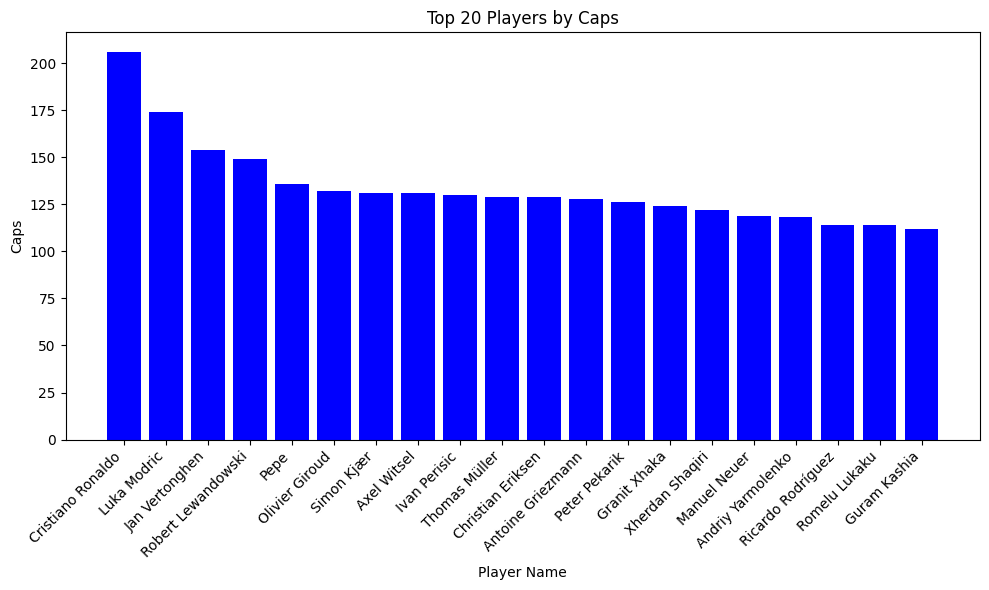

In [78]:
df_top_caps = df.nlargest(20, 'Caps')

# Plotting the top players based on Caps
plt.figure(figsize=(10, 6))
plt.bar(df_top_caps['Name'], df_top_caps['Caps'], color='blue')
plt.xlabel('Player Name')
plt.ylabel('Caps')
plt.title('Top 20 Players by Caps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

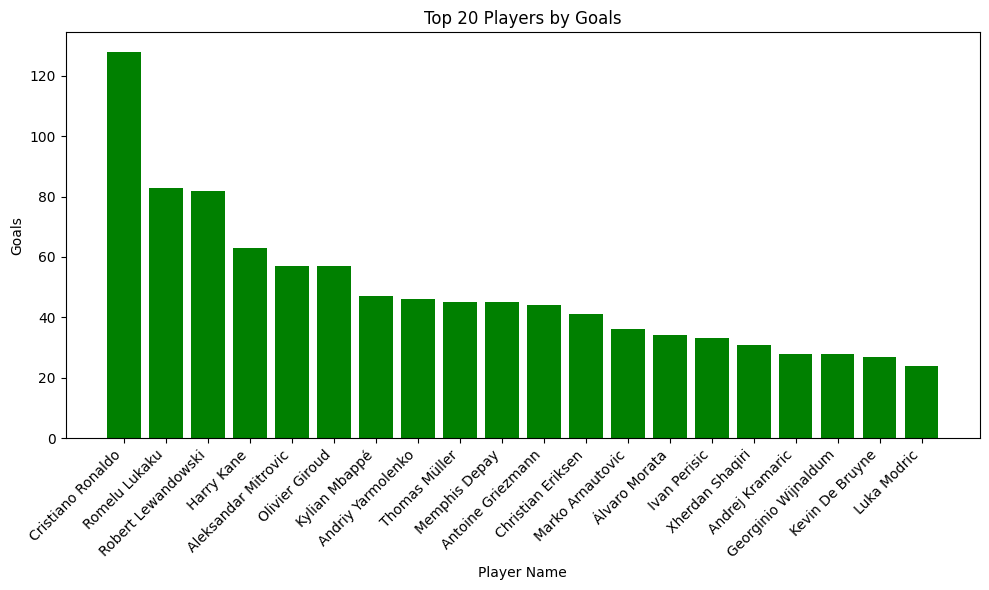

In [79]:
df_top_goals = df.nlargest(20, 'Goals')

# Plotting the top players based on Goals
plt.figure(figsize=(10, 6))
plt.bar(df_top_goals['Name'], df_top_goals['Goals'], color='green')
plt.xlabel('Player Name')
plt.ylabel('Goals')
plt.title('Top 20 Players by Goals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

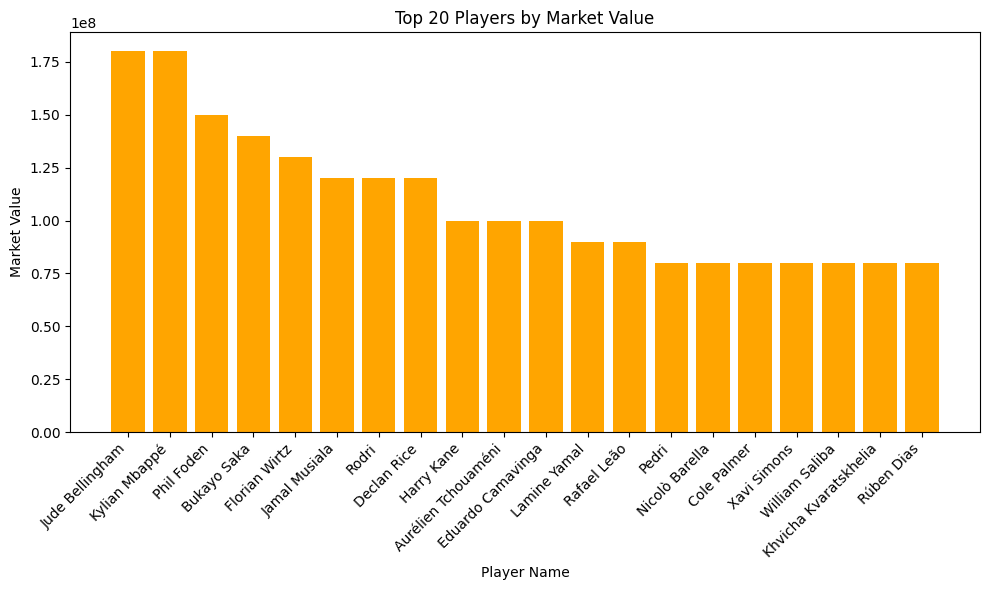

In [80]:
df_top_marketvalue = df.nlargest(20, 'MarketValue')

# Plotting the top players based on MarketValue
plt.figure(figsize=(10, 6))
plt.bar(df_top_marketvalue['Name'], df_top_marketvalue['MarketValue'], color='orange')
plt.xlabel('Player Name')
plt.ylabel('Market Value')
plt.title('Top 20 Players by Market Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [81]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


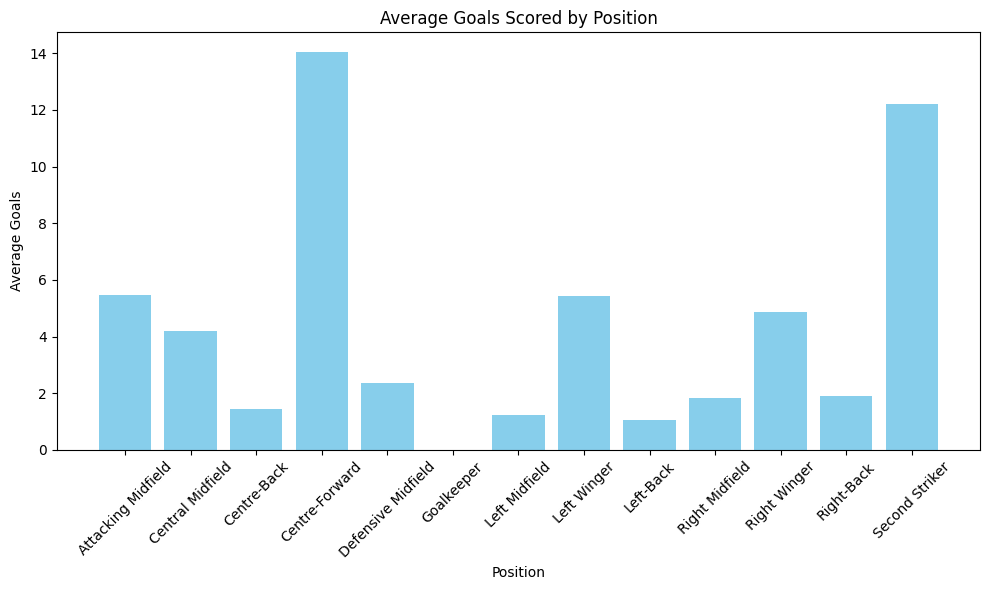

In [82]:
avg_goals_by_position = df.groupby('Position')['Goals'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_goals_by_position['Position'], avg_goals_by_position['Goals'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Average Goals')
plt.title('Average Goals Scored by Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


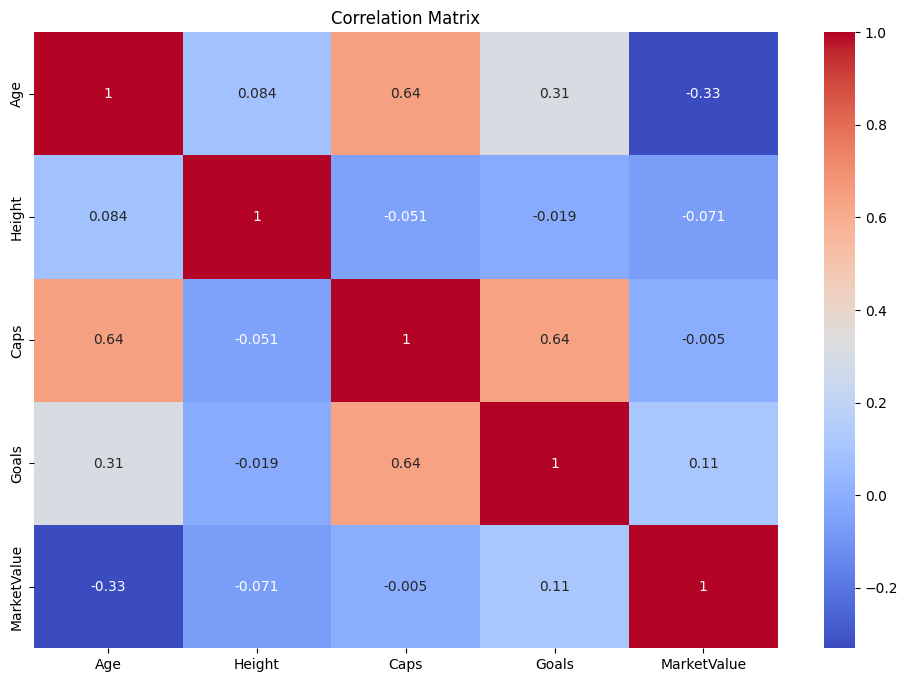

In [84]:
numeric_cols = df.select_dtypes(include=np.number).columns  
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Position' column
df['Position_encoded'] = label_encoder.fit_transform(df['Position'])
df['Foot_encoded'] = label_encoder.fit_transform(df['Foot'])
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])


df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country,Position_encoded,Foot_encoded,Country_encoded
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany,5,3,9
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany,5,3,9
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany,5,3,9
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany,2,2,9
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany,2,3,9


In [94]:
print(df['Position_encoded'].value_counts())
print(df['Foot_encoded'].value_counts())
print(df['Country_encoded'].value_counts())


Position_encoded
2     125
1      81
3      77
5      72
4      50
0      48
7      44
11     43
10     35
8      33
9       6
12      5
6       4
Name: count, dtype: int64
Foot_encoded
3    439
2    150
1     31
0      3
Name: count, dtype: int64
Country_encoded
13    27
17    26
14    26
8     26
22    26
23    26
15    26
18    26
1     26
12    26
16    26
9     26
5     26
6     26
19    26
11    26
0     26
3     26
20    26
21    26
10    26
4     26
7     25
2     25
Name: count, dtype: int64


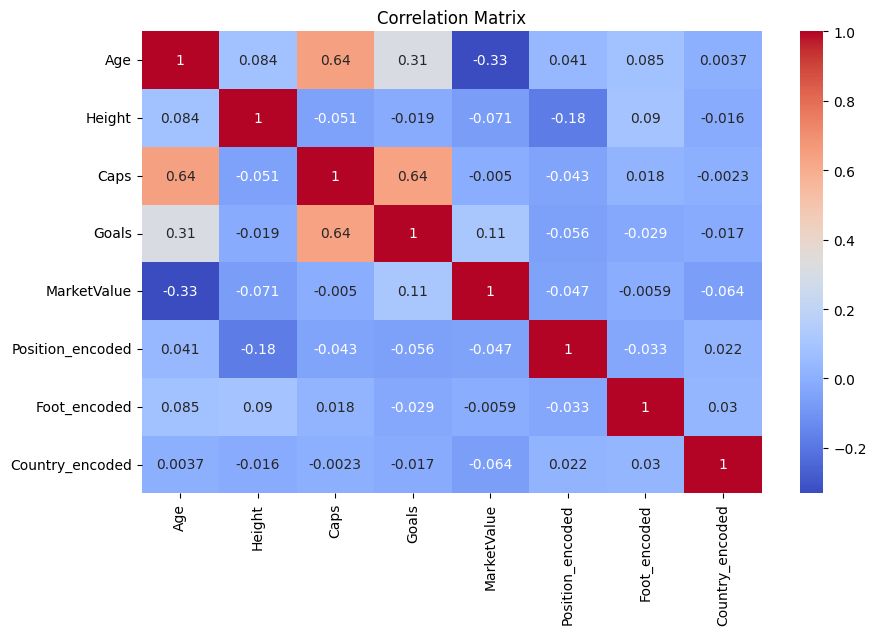

In [91]:
numeric_cols = df.select_dtypes(include=np.number).columns  
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [95]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country,Position_encoded,Foot_encoded,Country_encoded
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany,5,3,9
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany,5,3,9
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany,5,3,9
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany,2,2,9
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany,2,3,9
